# **Workout Classification - Tensorflow**

In [1]:
#@title Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

Download Data

In [2]:
# Upload first your data before execute these code below
path_workout = "/content/data_skripsi/situp20.csv"; # change this
path_other = "/content/data_skripsi/dance.csv"; # change this
name_class = "situp" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [3]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [4]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1338.498724,490.810325,1365.245261,532.430345,1363.991919,502.160801,1349.766126,625.583668,1359.910219,556.728938,...,709.689485,450.587296,437.865152,319.470438,441.561148,313.755788,1057.347579,453.392576,455.504543,522.552434
1,1326.996259,500.639644,1357.698050,552.160766,1360.505729,498.653750,1340.153851,649.724516,1338.252473,526.551769,...,665.317383,463.866108,329.940842,401.916186,367.150653,300.552946,188.096702,636.431044,216.572892,572.833459
2,1326.361501,494.594216,1356.135801,537.875009,1359.668513,501.839367,1342.279830,643.982487,1336.935193,558.226510,...,672.966753,472.645761,321.858230,406.728972,356.799810,299.335117,155.634259,692.087393,249.705764,556.538537
3,1327.616077,490.562925,1357.882881,533.402869,1351.879815,502.246220,1346.226528,643.370309,1340.182965,559.739931,...,672.893687,473.026792,319.415147,408.551188,356.214885,297.572959,155.170718,691.025715,250.738385,544.081996
4,1325.497897,492.328982,1358.740497,537.159275,1355.938592,489.864203,1347.503300,644.080793,1333.921858,524.139699,...,667.563666,463.951470,321.054330,412.992018,349.662482,301.798587,168.233866,685.251779,214.339462,589.744858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23822,919.191200,283.421406,929.802600,260.953464,885.143004,269.270568,934.918681,286.542236,841.720854,314.708867,...,975.954025,806.208282,1223.309679,484.715310,1226.960507,488.378297,1392.271934,823.628951,1388.260693,850.537270
23823,922.602207,267.197907,938.571865,245.688099,891.983293,258.580786,947.524208,276.748031,852.743706,309.616888,...,966.191976,804.773452,1220.349849,487.008515,1227.408951,491.242801,1387.682483,812.040127,1383.427657,843.006261
23824,938.777897,278.589531,954.951919,253.358153,905.987299,264.415138,966.957138,282.307299,863.909863,307.567123,...,956.010654,807.717967,1222.029847,490.744950,1214.848771,494.720990,1388.559361,811.563541,1374.327651,843.652580
23825,959.870295,277.368085,973.276376,255.476690,926.447314,264.518114,966.771585,282.816361,880.910556,308.539026,...,960.790165,811.394882,1224.752336,491.804227,1223.626410,493.937632,1388.733854,811.734091,1379.406549,843.989074


In [5]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,285.423521,118.696106,296.931298,107.450271,277.620952,112.022722,312.762457,101.063137,263.843182,102.281619,...,269.258930,192.833901,342.505188,225.863875,264.104471,218.966805,345.232966,255.732137,292.225127,242.555605
1,274.502717,46.653855,277.738255,42.862812,269.111851,43.306289,296.710474,29.511198,250.539507,36.460286,...,283.946620,122.173752,338.194428,173.601048,267.940098,158.695515,334.823457,251.993616,304.538417,246.991232
2,294.748268,66.817501,303.807395,51.827186,280.431260,51.601079,329.624989,51.390861,266.104774,49.938338,...,284.025786,165.582823,342.613998,248.553563,299.383363,247.459635,345.498414,305.455896,319.677769,308.384373
3,225.520697,199.456174,221.379983,188.187564,218.625622,193.372937,251.450022,169.737619,222.247693,171.836246,...,366.079301,161.956366,387.289339,160.640093,336.014188,147.984193,410.631467,174.564891,365.998675,165.817105
4,227.275255,200.807633,223.925845,193.119335,220.560449,194.369699,243.029111,170.566783,231.230959,173.507408,...,371.239109,165.072969,365.820360,189.059156,316.256986,173.733672,364.448191,178.624989,338.204119,176.047321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,216.205510,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005
3459,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,216.950703,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863
3460,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,153.726770,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254
3461,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,160.798068,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400


Data Preparation

In [6]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,1338.498724,490.810325,1365.245261,532.430345,1363.991919,502.160801,1349.766126,625.583668,1359.910219,556.728938,...,450.587296,437.865152,319.470438,441.561148,313.755788,1057.347579,453.392576,455.504543,522.552434,situp
1,1326.996259,500.639644,1357.698050,552.160766,1360.505729,498.653750,1340.153851,649.724516,1338.252473,526.551769,...,463.866108,329.940842,401.916186,367.150653,300.552946,188.096702,636.431044,216.572892,572.833459,situp
2,1326.361501,494.594216,1356.135801,537.875009,1359.668513,501.839367,1342.279830,643.982487,1336.935193,558.226510,...,472.645761,321.858230,406.728972,356.799810,299.335117,155.634259,692.087393,249.705764,556.538537,situp
3,1327.616077,490.562925,1357.882881,533.402869,1351.879815,502.246220,1346.226528,643.370309,1340.182965,559.739931,...,473.026792,319.415147,408.551188,356.214885,297.572959,155.170718,691.025715,250.738385,544.081996,situp
4,1325.497897,492.328982,1358.740497,537.159275,1355.938592,489.864203,1347.503300,644.080793,1333.921858,524.139699,...,463.951470,321.054330,412.992018,349.662482,301.798587,168.233866,685.251779,214.339462,589.744858,situp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23822,919.191200,283.421406,929.802600,260.953464,885.143004,269.270568,934.918681,286.542236,841.720854,314.708867,...,806.208282,1223.309679,484.715310,1226.960507,488.378297,1392.271934,823.628951,1388.260693,850.537270,situp
23823,922.602207,267.197907,938.571865,245.688099,891.983293,258.580786,947.524208,276.748031,852.743706,309.616888,...,804.773452,1220.349849,487.008515,1227.408951,491.242801,1387.682483,812.040127,1383.427657,843.006261,situp
23824,938.777897,278.589531,954.951919,253.358153,905.987299,264.415138,966.957138,282.307299,863.909863,307.567123,...,807.717967,1222.029847,490.744950,1214.848771,494.720990,1388.559361,811.563541,1374.327651,843.652580,situp
23825,959.870295,277.368085,973.276376,255.476690,926.447314,264.518114,966.771585,282.816361,880.910556,308.539026,...,811.394882,1224.752336,491.804227,1223.626410,493.937632,1388.733854,811.734091,1379.406549,843.989074,situp


In [7]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,285.423521,118.696106,296.931298,107.450271,277.620952,112.022722,312.762457,101.063137,263.843182,102.281619,...,192.833901,342.505188,225.863875,264.104471,218.966805,345.232966,255.732137,292.225127,242.555605,other
1,274.502717,46.653855,277.738255,42.862812,269.111851,43.306289,296.710474,29.511198,250.539507,36.460286,...,122.173752,338.194428,173.601048,267.940098,158.695515,334.823457,251.993616,304.538417,246.991232,other
2,294.748268,66.817501,303.807395,51.827186,280.431260,51.601079,329.624989,51.390861,266.104774,49.938338,...,165.582823,342.613998,248.553563,299.383363,247.459635,345.498414,305.455896,319.677769,308.384373,other
3,225.520697,199.456174,221.379983,188.187564,218.625622,193.372937,251.450022,169.737619,222.247693,171.836246,...,161.956366,387.289339,160.640093,336.014188,147.984193,410.631467,174.564891,365.998675,165.817105,other
4,227.275255,200.807633,223.925845,193.119335,220.560449,194.369699,243.029111,170.566783,231.230959,173.507408,...,165.072969,365.820360,189.059156,316.256986,173.733672,364.448191,178.624989,338.204119,176.047321,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005,other
3459,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863,other
3460,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254,other
3461,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400,other


In [8]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,1338.498724,490.810325,1365.245261,532.430345,1363.991919,502.160801,1349.766126,625.583668,1359.910219,556.728938,...,450.587296,437.865152,319.470438,441.561148,313.755788,1057.347579,453.392576,455.504543,522.552434,situp
1,1326.996259,500.639644,1357.698050,552.160766,1360.505729,498.653750,1340.153851,649.724516,1338.252473,526.551769,...,463.866108,329.940842,401.916186,367.150653,300.552946,188.096702,636.431044,216.572892,572.833459,situp
2,1326.361501,494.594216,1356.135801,537.875009,1359.668513,501.839367,1342.279830,643.982487,1336.935193,558.226510,...,472.645761,321.858230,406.728972,356.799810,299.335117,155.634259,692.087393,249.705764,556.538537,situp
3,1327.616077,490.562925,1357.882881,533.402869,1351.879815,502.246220,1346.226528,643.370309,1340.182965,559.739931,...,473.026792,319.415147,408.551188,356.214885,297.572959,155.170718,691.025715,250.738385,544.081996,situp
4,1325.497897,492.328982,1358.740497,537.159275,1355.938592,489.864203,1347.503300,644.080793,1333.921858,524.139699,...,463.951470,321.054330,412.992018,349.662482,301.798587,168.233866,685.251779,214.339462,589.744858,situp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27285,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005,other
27286,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863,other
27287,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254,other
27288,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400,other


In [9]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [10]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1338.498724,490.810325,1365.245261,532.430345,1363.991919,502.160801,1349.766126,625.583668,1359.910219,556.728938,...,709.689485,450.587296,437.865152,319.470438,441.561148,313.755788,1057.347579,453.392576,455.504543,522.552434
1,1326.996259,500.639644,1357.698050,552.160766,1360.505729,498.653750,1340.153851,649.724516,1338.252473,526.551769,...,665.317383,463.866108,329.940842,401.916186,367.150653,300.552946,188.096702,636.431044,216.572892,572.833459
2,1326.361501,494.594216,1356.135801,537.875009,1359.668513,501.839367,1342.279830,643.982487,1336.935193,558.226510,...,672.966753,472.645761,321.858230,406.728972,356.799810,299.335117,155.634259,692.087393,249.705764,556.538537
3,1327.616077,490.562925,1357.882881,533.402869,1351.879815,502.246220,1346.226528,643.370309,1340.182965,559.739931,...,672.893687,473.026792,319.415147,408.551188,356.214885,297.572959,155.170718,691.025715,250.738385,544.081996
4,1325.497897,492.328982,1358.740497,537.159275,1355.938592,489.864203,1347.503300,644.080793,1333.921858,524.139699,...,667.563666,463.951470,321.054330,412.992018,349.662482,301.798587,168.233866,685.251779,214.339462,589.744858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27285,441.690007,325.216735,451.749283,324.748468,451.951768,327.665714,438.416133,303.175625,440.294429,315.960998,...,216.205510,291.410536,341.885855,270.929752,258.522397,317.865852,244.188200,319.079436,220.545449,322.187005
27286,441.821579,323.648091,453.057630,321.262866,452.358246,326.598915,439.823980,301.758038,440.433759,315.335079,...,216.950703,291.441001,343.091874,270.361077,258.707810,317.199289,245.188647,318.501254,222.194233,323.091863
27287,418.687408,342.329056,436.929676,337.662644,438.213603,340.125404,444.616098,301.795184,448.858410,307.777851,...,153.726770,275.079463,280.930687,313.695846,263.868041,321.175824,162.415290,324.585885,146.967110,325.355254
27288,417.084477,339.889987,437.187064,333.040071,439.789192,335.108702,447.842784,291.841417,451.806723,292.068572,...,160.798068,264.921907,282.643417,317.689493,253.913307,324.613554,179.024646,323.544432,142.890083,324.253400


In [11]:
y

,class
0,situp
1,situp
2,situp
3,situp
4,situp
...,...
27285,other
27286,other
27287,other
27288,other


In [12]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [13]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [14]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,2.091404,1.363362,2.133196,1.478973,2.131237,1.394891,2.109010,1.737732,2.124860,1.546469,...,1.108890,1.251631,0.684164,0.887418,0.689939,0.871544,1.652106,1.259424,0.711726,1.451535
1,2.073432,1.390666,2.121403,1.533780,2.125790,1.385149,2.093990,1.804790,2.091019,1.462644,...,1.039558,1.288517,0.515533,1.116434,0.573673,0.834869,0.293901,1.767864,0.338395,1.591204
2,2.072440,1.373873,2.118962,1.494097,2.124482,1.393998,2.097312,1.788840,2.088961,1.550629,...,1.051511,1.312905,0.502903,1.129803,0.557500,0.831486,0.243179,1.922465,0.390165,1.545940
3,2.074400,1.362675,2.121692,1.481675,2.112312,1.395128,2.103479,1.787140,2.094036,1.554833,...,1.051396,1.313963,0.499086,1.134864,0.556586,0.826592,0.242454,1.919516,0.391779,1.511339
4,2.071090,1.367581,2.123032,1.492109,2.118654,1.360734,2.105474,1.789113,2.084253,1.455944,...,1.043068,1.288754,0.501647,1.147200,0.546348,0.838329,0.262865,1.903477,0.334905,1.638180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27285,0.690141,0.903380,0.705858,0.902079,0.706175,0.910183,0.685025,0.842155,0.687960,0.877669,...,0.337821,0.809474,0.534197,0.752583,0.403941,0.882961,0.381544,0.886332,0.344602,0.894964
27286,0.690346,0.899022,0.707903,0.892397,0.706810,0.907219,0.687225,0.838217,0.688178,0.875931,...,0.338985,0.809558,0.536081,0.751003,0.404231,0.881109,0.383107,0.884726,0.347178,0.897477
27287,0.654199,0.950914,0.682703,0.937952,0.684709,0.944793,0.694713,0.838320,0.701341,0.854938,...,0.240198,0.764110,0.438954,0.871377,0.412294,0.892155,0.253774,0.901627,0.229636,0.903765
27288,0.651694,0.944139,0.683105,0.925111,0.687171,0.930858,0.699754,0.810671,0.705948,0.811302,...,0.251247,0.735894,0.441630,0.882471,0.396740,0.901704,0.279726,0.898735,0.223266,0.900704


One Hot Encoding

In [15]:
y = pd.get_dummies(y).values
y

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [16]:
y = y.astype(np.uint8)  # Only change the data type if already in one-hot form
y


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

Split Dataset

In [17]:
from sklearn.model_selection import train_test_split

# First, split into 70% training and 30% temporary data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)


In [18]:
# Then, split the temporary data into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [19]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 19103
The number of test data X is: 4094
The number of train data y is : 19103
The number of test daya y is : 4094
The total dataset is : 27290


Modelling

In [20]:
# Ref: https://github.com/tringn/2D-Keypoints-based-Pose-Classifier
# Train the model with the updated parameters and callbacks
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),  # Reduced number of neurons
    tf.keras.layers.Dropout(0.4),  # Higher dropout to reduce overfitting
    tf.keras.layers.Dense(8, activation='relu'),   # Another simplified layer
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714 (2.79 KB)

 Trainable params: 714 (2.79 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [22]:
# Compile the model with optimizer and loss function
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
# Set up callbacks for early stopping and learning rate adjustment
callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    patience=10,  # Stops if no improvement after 10 epochs
    restore_best_weights=True  # Ensures best weights are kept
)

In [24]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 5e-4 * 0.95 ** epoch)


In [25]:
# Compile the model with optimizer and loss function
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model with regularization and callbacks
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    callbacks=[callback_es, lr_schedule],  # Early stopping and learning rate decay
    epochs=50
)

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7231 - loss: 0.6196 - val_accuracy: 0.8679 - val_loss: 0.2432 - learning_rate: 5.0000e-04
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8622 - loss: 0.3562 - val_accuracy: 0.8679 - val_loss: 0.1770 - learning_rate: 4.7500e-04
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8808 - loss: 0.2722 - val_accuracy: 0.9084 - val_loss: 0.1215 - learning_rate: 4.5125e-04
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9125 - loss: 0.2037 - val_accuracy: 0.9897 - val_loss: 0.0778 - learning_rate: 4.2869e-04
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9260 - loss: 0.1634 - val_accuracy: 0.9966 - val_loss: 0.0562 - learning_rate: 4.0725e-04
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9397 - loss: 0.1336 - val_accuracy: 0.9988 - val_loss: 0.0455 - learning_rate: 3.8689e-04
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 

Visualization Acc & Loss

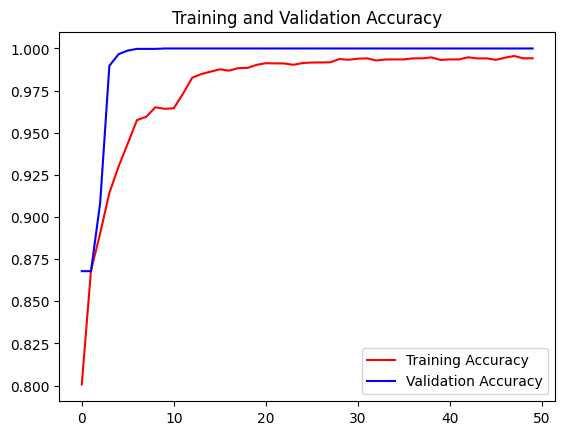

<Figure size 640x480 with 0 Axes>

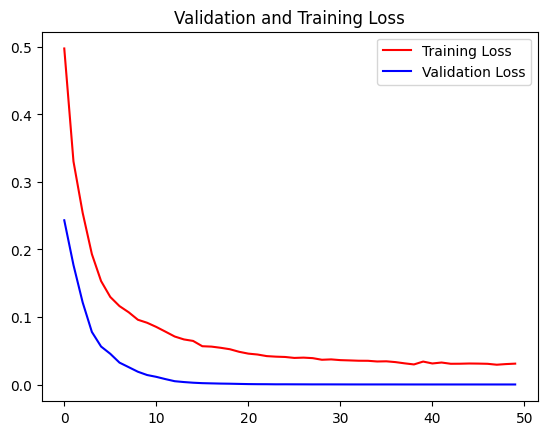

<Figure size 640x480 with 0 Axes>

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Evaluation

In [27]:
# After training your model, access the final values
accuracy = history.history['accuracy'][-1]  # Last training accuracy
loss = history.history['loss'][-1]  # Last training loss
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy
val_loss = history.history['val_loss'][-1]  # Last validation loss

# Print the formatted output
print(f"accuracy: {accuracy:.4f} - loss: {loss:.4f} - val_accuracy: {val_accuracy:.4f} - val_loss: {val_loss:.4f}")


accuracy: 0.9942 - loss: 0.0309 - val_accuracy: 1.0000 - val_loss: 0.0000


In [28]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 4.269889905117452e-05
Test accuracy: 1.0


Test Prediction

In [29]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
9082,1.426396,0.910889,1.423685,0.825153,1.427652,0.825736,1.543399,0.786516,1.548125,0.769169,...,1.499468,2.112777,1.103718,1.412856,1.151802,1.319745,0.794584,1.974868,0.814619,1.930325


In [30]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : situp


In [31]:
df_data['class'].unique()

array(['situp', 'other'], dtype=object)

In [32]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [51]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
situp


In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 541    0]
 [   0 3553]]


In [41]:
# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00      3553

    accuracy                           1.00      4094
   macro avg       1.00      1.00      1.00      4094
weighted avg       1.00      1.00      1.00      4094



128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


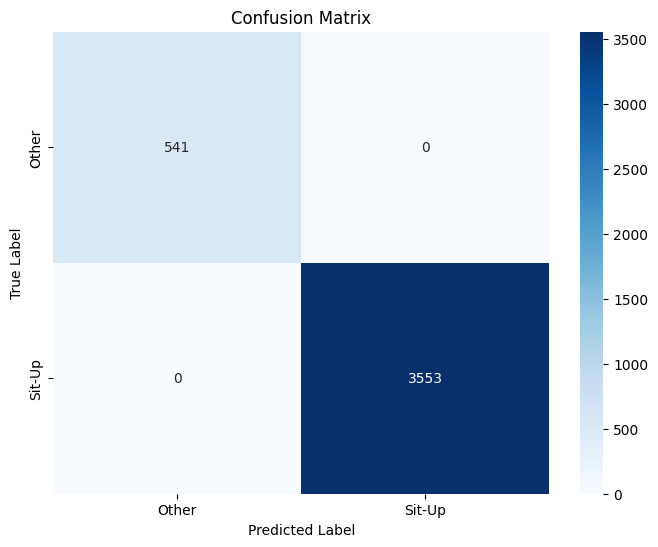

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Prediksi data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Other', 'Sit-Up'], yticklabels=['Other', 'Sit-Up'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

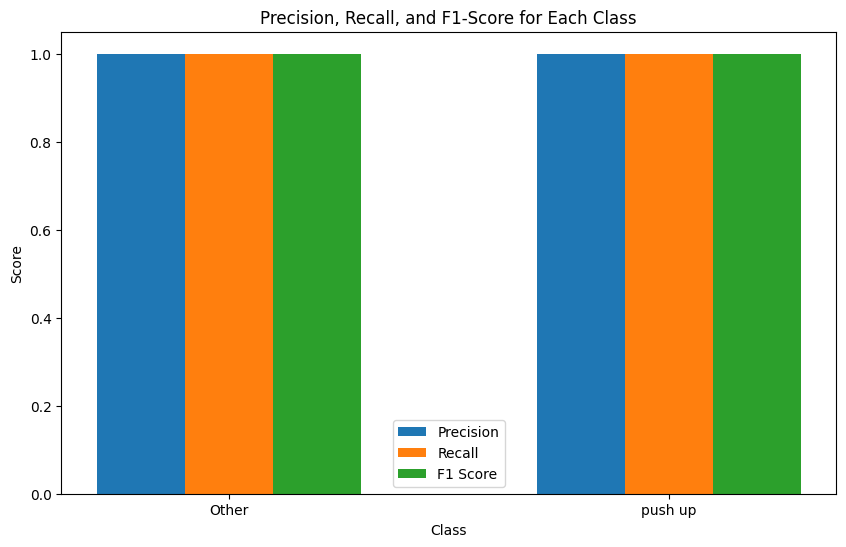

In [43]:
from sklearn.metrics import precision_recall_fscore_support

# Dapatkan metrik precision, recall, dan F1
precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes)

# Buat grafik batang
labels = ['Other', 'push up']
x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.4 for p in x], f1, width=0.2, label='F1 Score', align='center')

plt.xticks([p + 0.2 for p in x], labels)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.legend()
plt.show()

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
 [[ 541    0]
 [   0 3553]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       541
           1       1.00      1.00      1.00      3553

    accuracy                           1.00      4094
   macro avg       1.00      1.00      1.00      4094
weighted avg       1.00      1.00      1.00      4094

ROC AUC Score: 1.0


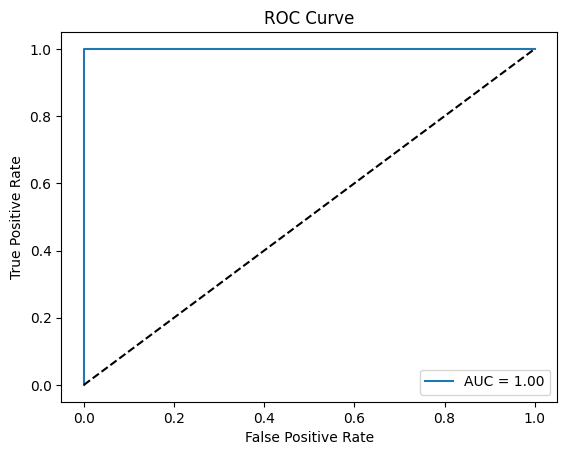

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Pastikan y_test dalam bentuk 1D (jika belum dalam bentuk label, konversi menggunakan argmax)
y_test_classes = y_test if y_test.ndim == 1 else np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

# ROC AUC Score (binary case)
if len(np.unique(y_test_classes)) == 2:  # Pastikan ini kasus biner
    roc_auc = roc_auc_score(y_test_classes, y_pred[:, 1])  # Menggunakan probabilitas kelas positif
    print("ROC AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:, 1])  # Menggunakan probabilitas kelas positif
    plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
else:
    print()

Export Model

In [45]:
import tensorflow as tf
from google.colab import files


In [46]:

# 1. Save the model in H5 format
h5_model_file = "model.h5"
model.save(h5_model_file)  # Save the model as H5
print(f"Model saved as {h5_model_file}")

Model saved as model.h5


In [47]:
# 2. Convert the model to TensorFlow Lite
# Load the model back from H5
model_loaded = tf.keras.models.load_model(h5_model_file)

In [48]:
# Convert to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_loaded)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Apply optimization (optional)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpve8jhlzr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 34), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138365525251824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138365525257104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138365525451776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138365525452656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138365524978048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138365524969072: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [49]:
# 3. Save the converted model
tflite_model_file = "model.tflite"
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)
print(f"Model converted and saved as {tflite_model_file}")

Model converted and saved as model.tflite


In [50]:
# 4. Download both H5 and TFLite models
files.download(h5_model_file)  # Download H5 model
files.download(tflite_model_file)  # Download TFLite model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>